In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, MiniBatchKMeans

%matplotlib inline

In [54]:
import preprocess.user_load_data as user_load_data
import preprocess.pipline as pipline
import cluster.K_Means as K_Means
import importlib

importlib.reload(user_load_data)
importlib.reload(pipline)
importlib.reload(K_Means)

<module 'cluster.K_Means' from 'D:\\Project\\Python\\household-electricity\\cluster\\K_Means.py'>

In [55]:
dataSet = pipline.load_preprocess_dataSet('2018-08-28-21-04-49_max_min_sum_w_dataSet.csv')
dataSet.head()

,userId,reportTime,period_1,period_2,period_3,period_4,period_5,period_6,period_7,period_8,...,period_90,period_91,period_92,period_93,period_94,period_95,period_96,wMax,wMin,wSum
uuid,,,,,,,,,,,,,,,,,,,,,
1020170801,1,2017-08-01,907.80,701.2,964.2,817.75,813.6,1037.8,723.2,494.60,...,1840.6,1320.40,1093.4,907.0,893.0,906.8,469.75,4595.2,135.50,20667.67
1020170802,1,2017-08-02,693.80,694.8,947.6,1022.60,1286.6,848.6,1360.0,1220.00,...,1537.0,1150.20,1271.0,1236.4,1567.8,1151.8,1392.60,3382.5,176.75,21649.61
1020170803,1,2017-08-03,974.25,1343.2,1513.0,844.80,1148.4,1326.2,1319.8,879.00,...,902.0,797.00,962.8,791.4,951.4,884.2,734.80,4585.4,149.20,32833.36
1020170804,1,2017-08-04,1090.25,979.6,699.8,914.20,674.6,676.8,752.6,887.33,...,3004.6,2508.75,1623.0,1172.2,1183.8,889.0,1394.00,5295.8,137.20,24774.05
1020170805,1,2017-08-05,1080.50,1151.0,1109.6,883.20,1106.2,1104.6,1153.0,954.25,...,3130.8,2971.50,1988.4,1750.8,1204.2,1276.0,1221.00,3130.8,169.60,28111.41


In [39]:
tmpdataSet = pipline.get_peroid_column_dataSet(dataSet)
tmpdataSet.head()

,userId,period_1,period_2,period_3,period_4,period_5,period_6,period_7,period_8,period_9,...,period_87,period_88,period_89,period_90,period_91,period_92,period_93,period_94,period_95,period_96
uuid,,,,,,,,,,,,,,,,,,,,,
1020170801,1,907.80,701.2,964.2,817.75,813.6,1037.8,723.2,494.60,717.6,...,1577.2,4020.0,4583.25,1840.6,1320.40,1093.4,907.0,893.0,906.8,469.75
1020170802,1,693.80,694.8,947.6,1022.60,1286.6,848.6,1360.0,1220.00,788.2,...,1818.2,1599.2,1741.60,1537.0,1150.20,1271.0,1236.4,1567.8,1151.8,1392.60
1020170803,1,974.25,1343.2,1513.0,844.80,1148.4,1326.2,1319.8,879.00,1292.0,...,1571.0,4096.6,1514.00,902.0,797.00,962.8,791.4,951.4,884.2,734.80
1020170804,1,1090.25,979.6,699.8,914.20,674.6,676.8,752.6,887.33,794.4,...,5295.8,3434.0,2591.60,3004.6,2508.75,1623.0,1172.2,1183.8,889.0,1394.00
1020170805,1,1080.50,1151.0,1109.6,883.20,1106.2,1104.6,1153.0,954.25,581.6,...,630.0,2593.2,2957.20,3130.8,2971.50,1988.4,1750.8,1204.2,1276.0,1221.00


In [40]:
peroid_column = user_load_data.create_peroid_column()
n_clusters = 3
kmeans_fit = KMeans(n_clusters=n_clusters).fit(tmpdataSet[peroid_column])

# # 每個集群中心點的標籤
# kmeans_fit.labels_
# # 每個集群中心的坐標
# kmeans_fit.cluster_centers_
# # 所有樣本距離集群中心點的距離總和
# kmeans_fit.inertia_

# 將 K-Means 每個集群中心的坐標資料存成 dataFrame
KMeans_cluster_centers_df = K_Means.get_cluster_centers_dataFrame(kmeans_fit.cluster_centers_)
# 將 K-Means 每個集群中心的坐標資料資料存成 CSV
K_Means.save_cluster_centers_csv(KMeans_cluster_centers_df, n_clusters)
KMeans_cluster_centers_df.head()

save: data/2018-08-29-11-07-58_K-Means_3-cluster_centers.csv


,index,period_1,period_10,period_11,period_12,period_13,period_14,period_15,period_16,period_17,...,period_88,period_89,period_9,period_90,period_91,period_92,period_93,period_94,period_95,period_96
0,0,1002.58,721.29,686.97,661.35,661.13,635.71,630.64,613.97,631.70,...,2047.30,1976.93,744.12,1735.04,1451.11,1286.38,1271.85,1203.68,1176.43,1088.53
1,1,324.39,204.96,199.66,195.63,196.29,198.57,199.26,190.59,189.46,...,425.14,449.75,212.80,479.08,475.22,442.35,430.04,413.17,389.61,354.12
2,2,759.59,486.83,470.85,453.00,470.36,469.34,461.24,440.24,436.70,...,816.67,849.70,495.50,874.33,856.18,889.10,868.63,832.08,828.53,815.28


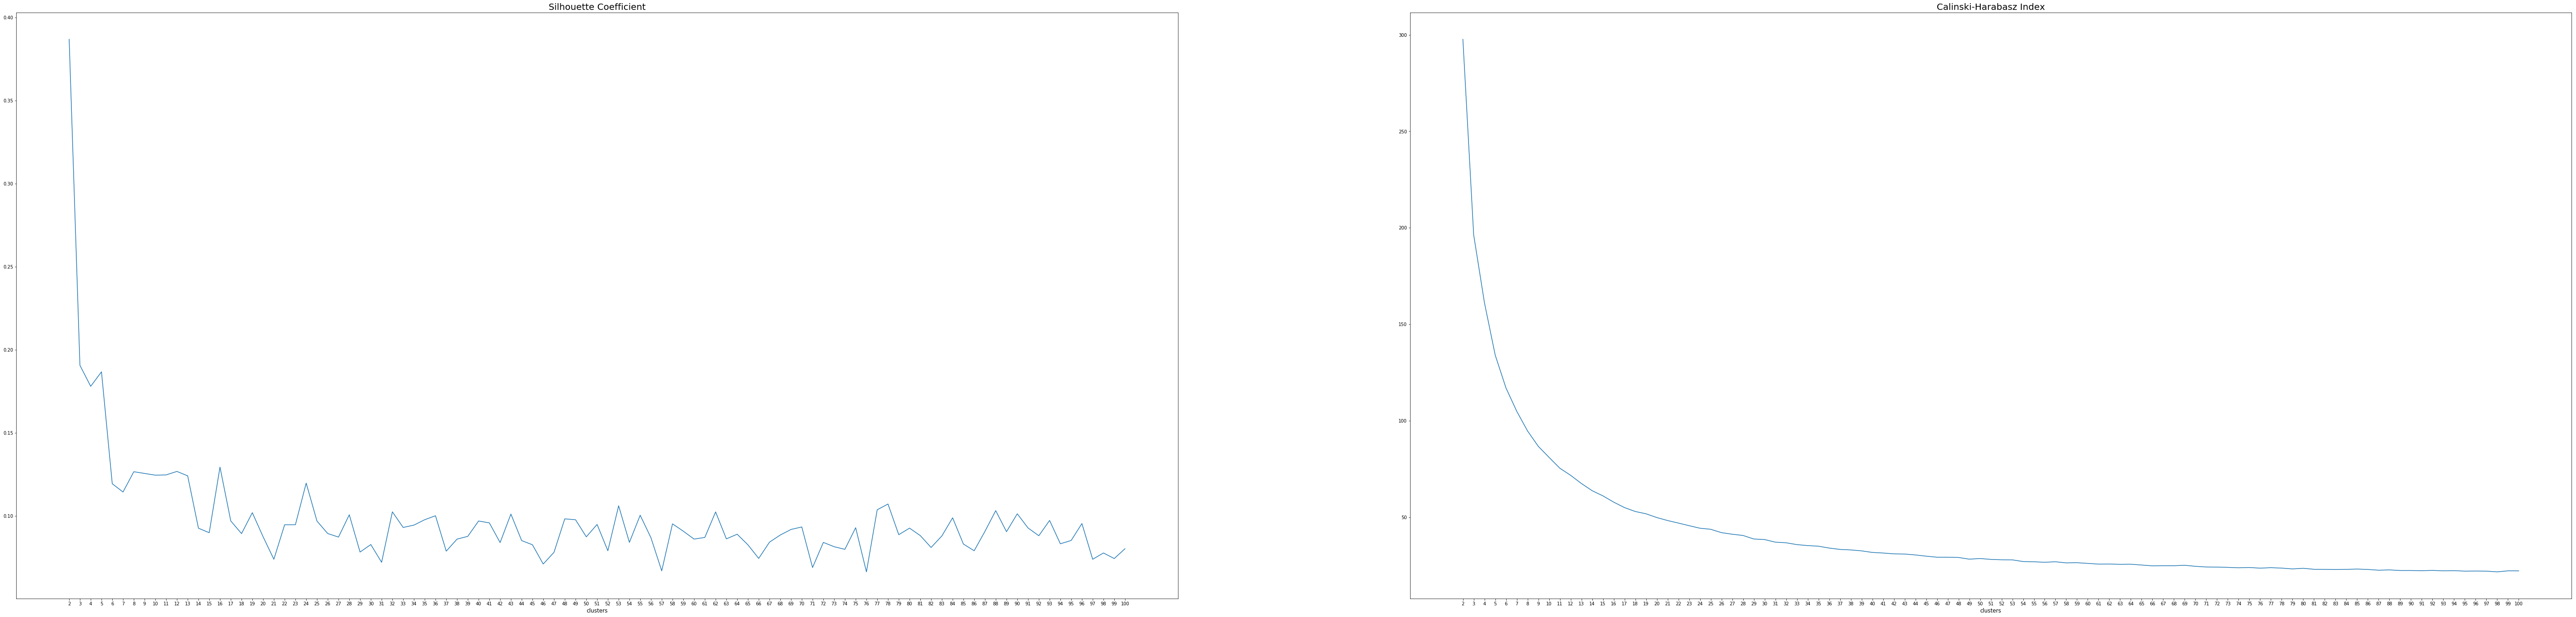

In [56]:
K_Means.evaluate_visualization(tmpdataSet, 2, 100)